In [1]:
#to plot inside jupyter
#%matplotlib inline 

#to plot in new windows
#%matplotlib qt 

Write the location of the Photos Folder please:asd
Total Number of Photos:
0


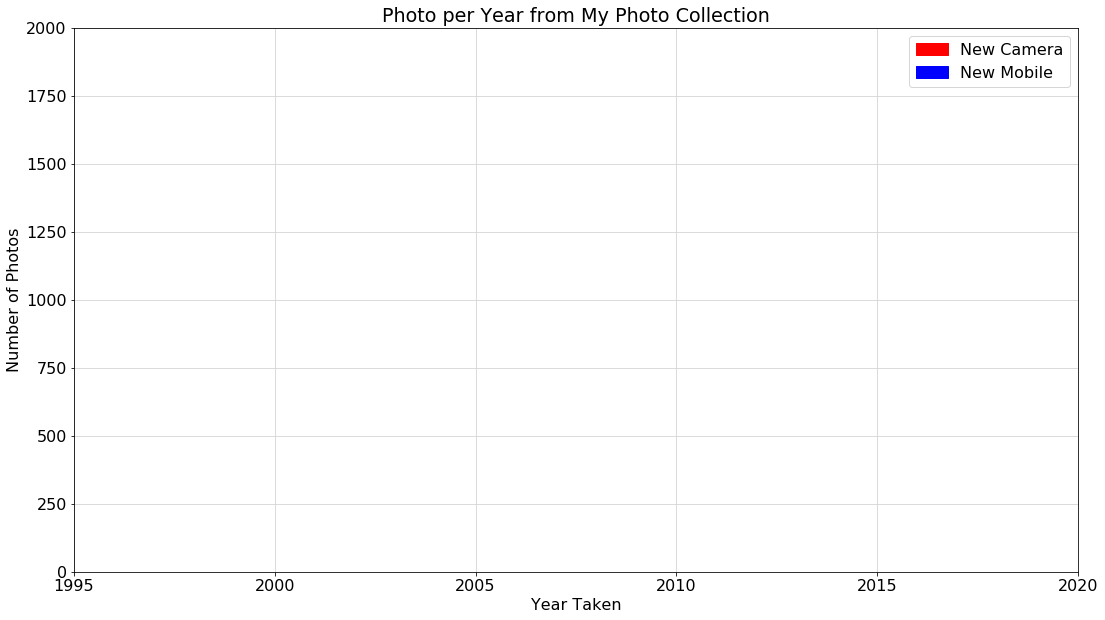

In [3]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os.path, time
from PIL import Image
import exifread

#Loop unitl input availabe
while True:            
    directory = input('Write the location of the Photos Folder please:')
    if directory != "" :     
        break
        
values = []
#Recursive looking for files
for root, directories, filenames in os.walk(directory):
    for file in filenames: 
        if file.lower().endswith(('.png', '.jpg', '.jpeg')): 
                
            with open(root+"/"+file, 'rb') as f:
                tags = exifread.process_file(f, details=False)   
            #Check image date taken    
            if "EXIF DateTimeOriginal" in tags.keys():
                DateTimeOriginal = tags["EXIF DateTimeOriginal"]
                x = DateTimeOriginal.values
                x = ''.join(x.split())
                if x != '':
                    xx = x[:4]
                    values.append(int(xx))
            #Check image date modified
            else:
                x = time.ctime(os.path.getmtime(root+"/"+file))
                xx = x[-4:]
                values.append(int(xx))
                      
def countX(lst, x): 
    return lst.count(x) 

print("Total Number of Photos:")
print(len(values))

#Font
font = {'size': 16}
plt.rc('font', **font)

plt.figure(figsize=(18,10))
plt.title('Photo per Year from My Photo Collection')
plt.xlabel('Year Taken')
plt.ylabel('Number of Photos')
#plt.axis()
plt.axis([1995, 2020, 0, 2000])

#Grid
plt.grid(True,color='lightgrey')
N, bins, patches = plt.hist(values,edgecolor='black',bins=50,align='left' , alpha=0.75,range=(1995,2020))

#Legend
lpatch = mpatches.Patch(color='r',label='New Camera')
lpatch2 = mpatches.Patch(color='b',label='New Mobile')
plt.legend(handles=[lpatch,lpatch2])

#Custom colors
for i in range(30,32):    
    patches[i].set_facecolor('b')
for i in range(45, 47):
    patches[i].set_facecolor('r')

plt.show()